In [1]:
# !pip install seaborn   #{! mark is used with pip in jupyter notebook}

# Data Cleaning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')    #encoding='unicode_escape'  {to avoid encoding error}

In [5]:
df.shape

(11255, 15)

In [6]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
6,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0,NaN,NaN
7,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.0,NaN,NaN
8,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
9,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11255 entries, 0 to 11254
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11255 non-null  int64  
 1   Cust_name         11255 non-null  object 
 2   Product_ID        11255 non-null  object 
 3   Gender            11255 non-null  object 
 4   Age Group         11255 non-null  object 
 5   Age               11255 non-null  int64  
 6   Marital_Status    11255 non-null  int64  
 7   State             11255 non-null  object 
 8   Zone              11255 non-null  object 
 9   Occupation        11255 non-null  object 
 10  Product_Category  11255 non-null  object 
 11  Orders            11255 non-null  int64  
 12  Amount            11243 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Dropping of null columns

In [8]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [9]:
# pd.isnull(df).sum)()
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# deleting null values

In [10]:
df.dropna(inplace=True)   #it will delete null values rows completly
#df.fillna(.......,inplace=True)
#df['order'].fillna(.......,inplace=True)           
#x=df['order'].mean()  /.mode()   / median()

#  Change data type 

In [11]:
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
# df.shape
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Renaming of the column

In [14]:
df.rename(columns={'Zone':'Region'},inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Region,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11250,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11251,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11252,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11253,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


# Dropping of duplicate data

In [15]:
df.shape   #shape before

(11243, 13)

In [16]:
# df.duplicated()
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Region,Occupation,Product_Category,Orders,Amount
4,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
14,1004035,Elijah,P00080342,F,18-25,20,1,Andhra Pradesh,Southern,IT Sector,Auto,2,23730
21,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
1863,1003563,Becky,P00205942,F,26-35,27,1,Maharashtra,Western,Banking,Food,3,15691
4407,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
5545,1004007,Shifley,P00054942,F,36-45,44,0,Delhi,Central,Govt,Footwear & Shoes,4,8134
5707,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
5912,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
6177,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923
8655,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345


In [17]:
df.drop_duplicates(keep='first',inplace=True )
# df

In [18]:
df.shape   #after shape

(11231, 13)

# Reseting Index

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Region,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
7,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
8,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799
9,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770


In [21]:
# df.shape

In [22]:
df.describe()
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


In [40]:
df.to_csv('Cleaned_data.csv',index=False)

# Exploratory Data Analysis

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Region', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Genderwise  Count

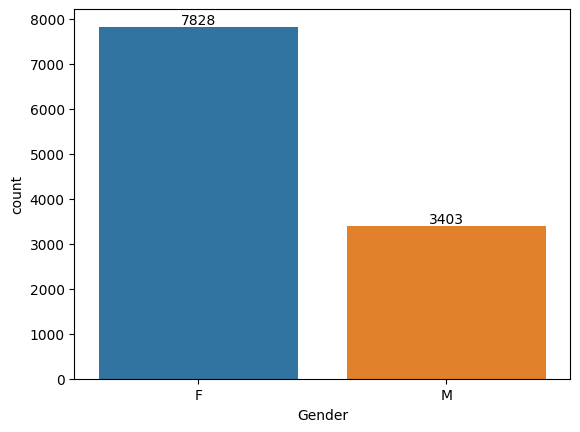

In [24]:
#gender graph=gh
gh=sns.countplot(x='Gender',data=df)
for i in gh.containers:
    gh.bar_label(i)

# Gender - wise Sale 

In [25]:
sales=df.groupby(['Gender'],as_index=False)['Amount'].sum()   #+.sort_values(ascending=False)
sales

,Gender,Amount
0,F,74307679
1,M,31871146


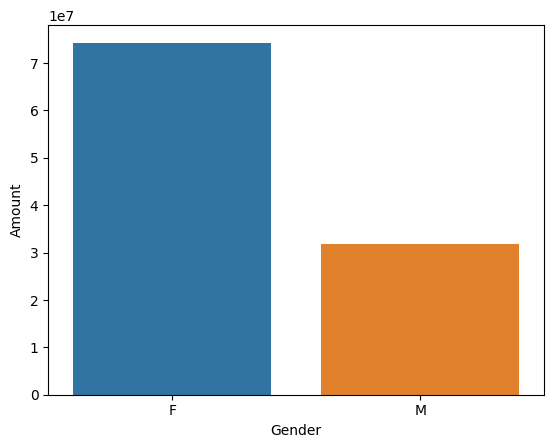

In [26]:
gs=sns.barplot(x='Gender',y='Amount',data=sales)

# Age Group  Gender-Wise  Count

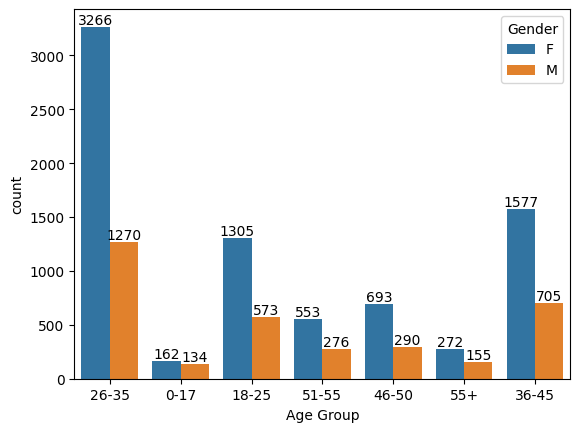

In [27]:
ag=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ag.containers:
    ag.bar_label(bars)

# Age Group wise Sales

<Axes: xlabel='Age Group', ylabel='Amount'>

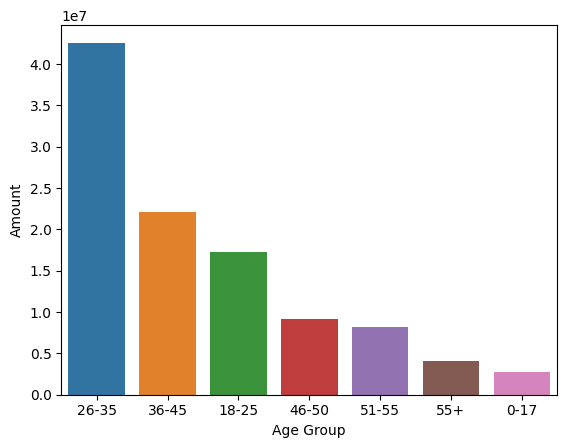

In [28]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

From above graph we can see females of age group 26-35 spents shops more and also spent most money.

# Top 10 states By order Volume

<Axes: xlabel='State', ylabel='Orders'>

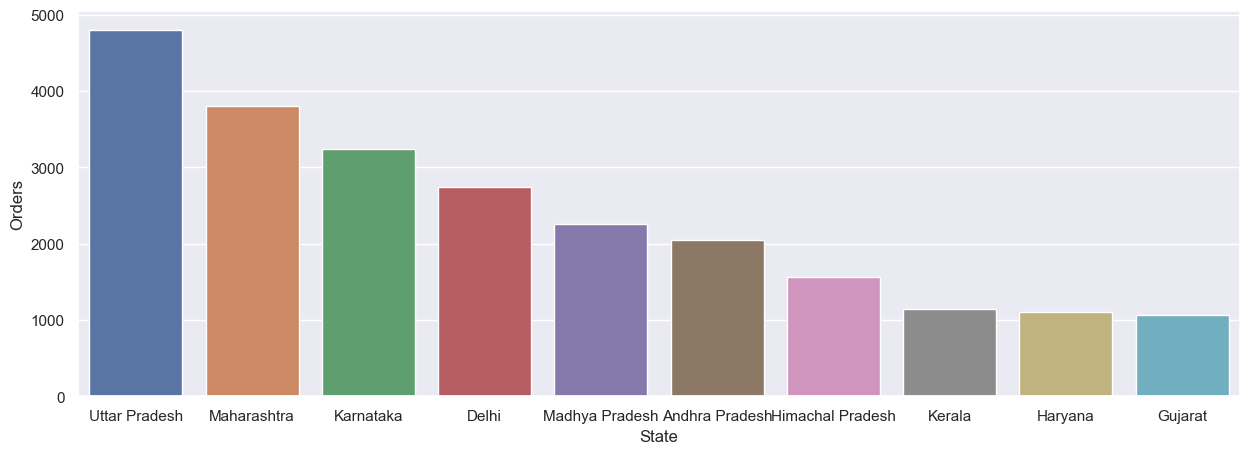

In [29]:
state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=state)

We can concllude that Uttar Pradesh is leading state for most orders followed by Maharastra and Karnataka.

# Top 10 states by Amount spent

<Axes: xlabel='State', ylabel='Amount'>

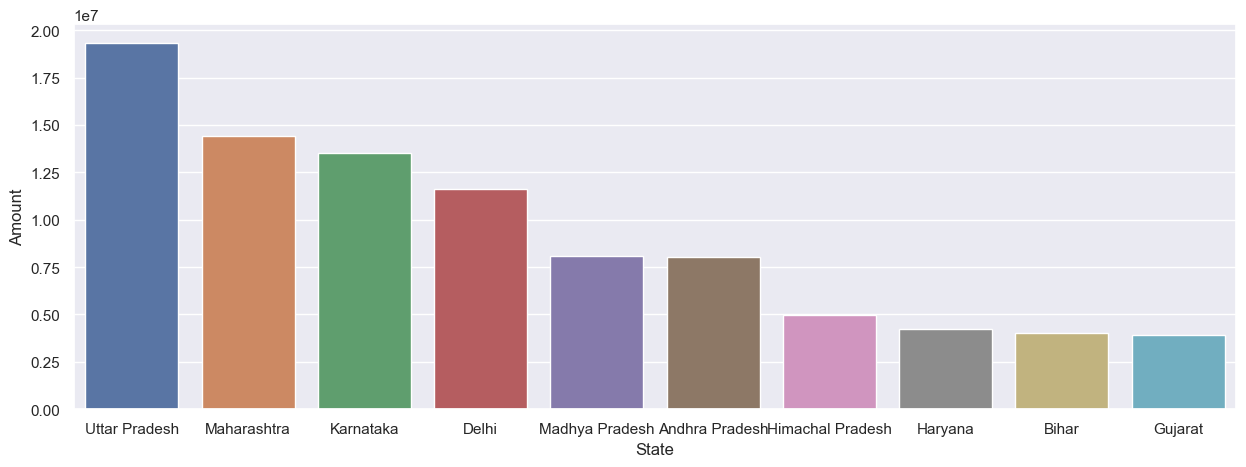

In [30]:
sales_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_amount, x = 'State',y= 'Amount')

# Marital Status

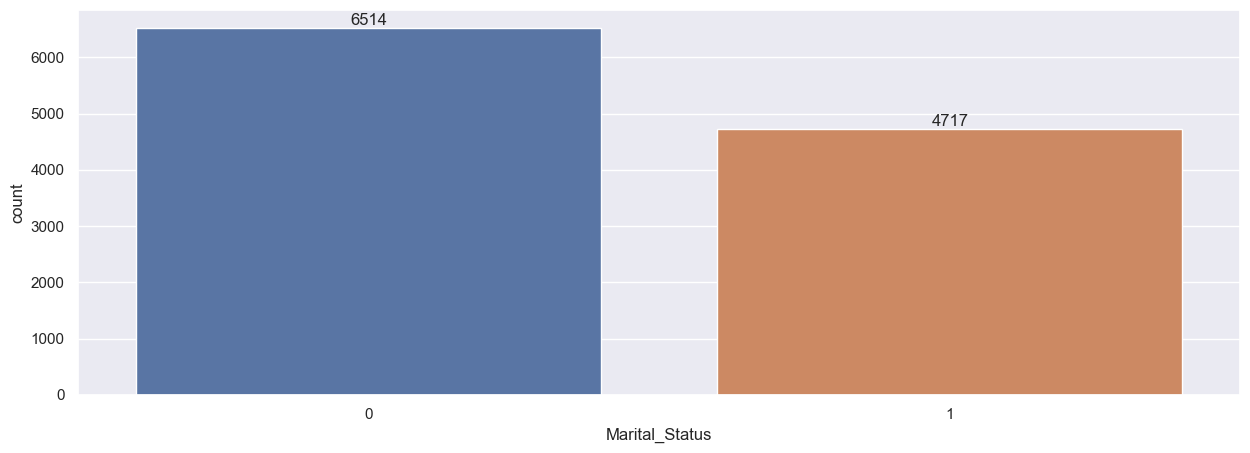

In [31]:
gh=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(1,2)})
for i in gh.containers:
    gh.bar_label(i)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

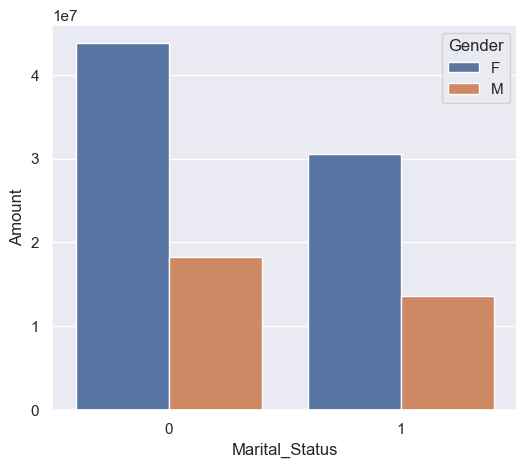

In [32]:
gh=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=gh,x='Marital_Status',y='Amount',hue='Gender')

From above graph we can conclude that Married Women has shopped most and they have highest purchasing power.

# Occupation

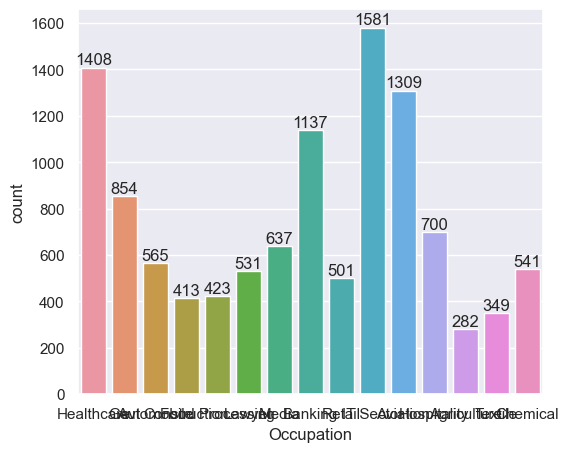

In [33]:
gh=sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(25,5)})
for i in gh.containers:
    gh.bar_label(i)

<Axes: xlabel='Occupation', ylabel='Amount'>

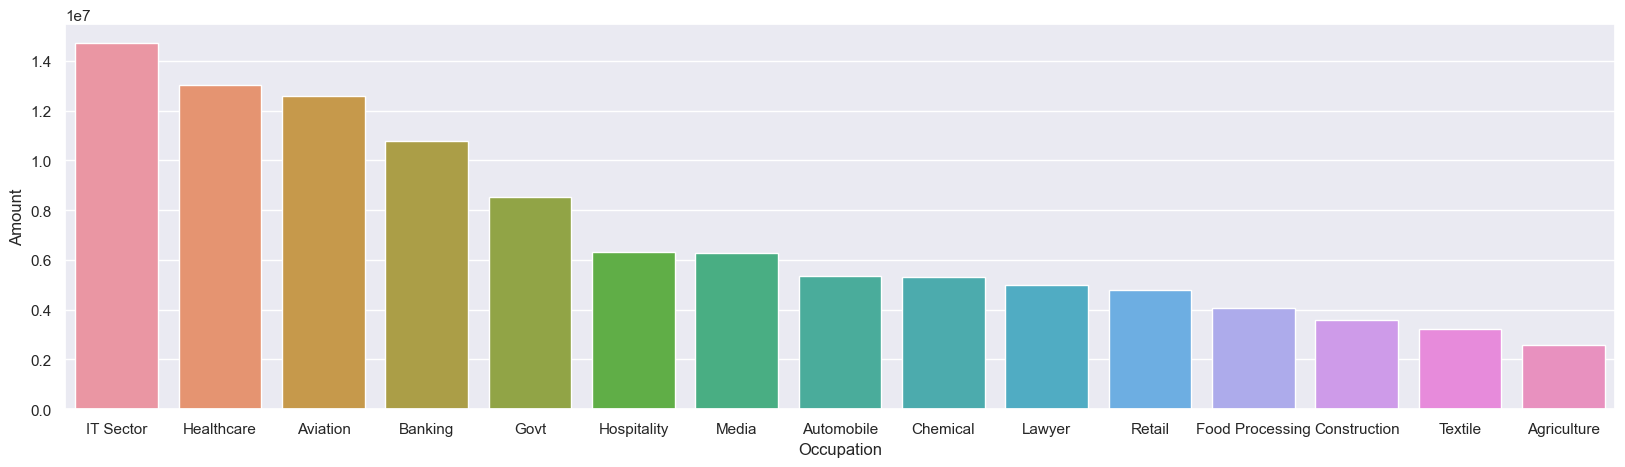

In [34]:
gh=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=gh,x='Occupation',y='Amount')


From above graph we can see the most of the buyers are working in IT,Aviation and Healthcare

# Product Category

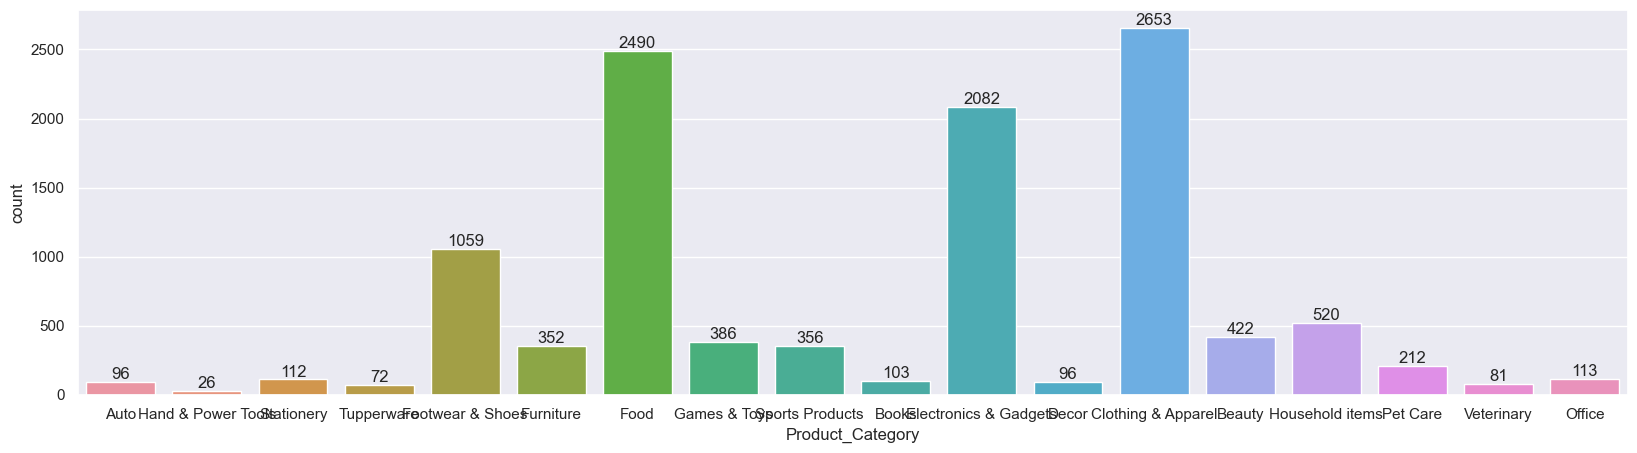

In [35]:
gh=sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(25,6)})

for i in gh.containers:
    gh.bar_label(i)

<Axes: xlabel='Product_Category', ylabel='Amount'>

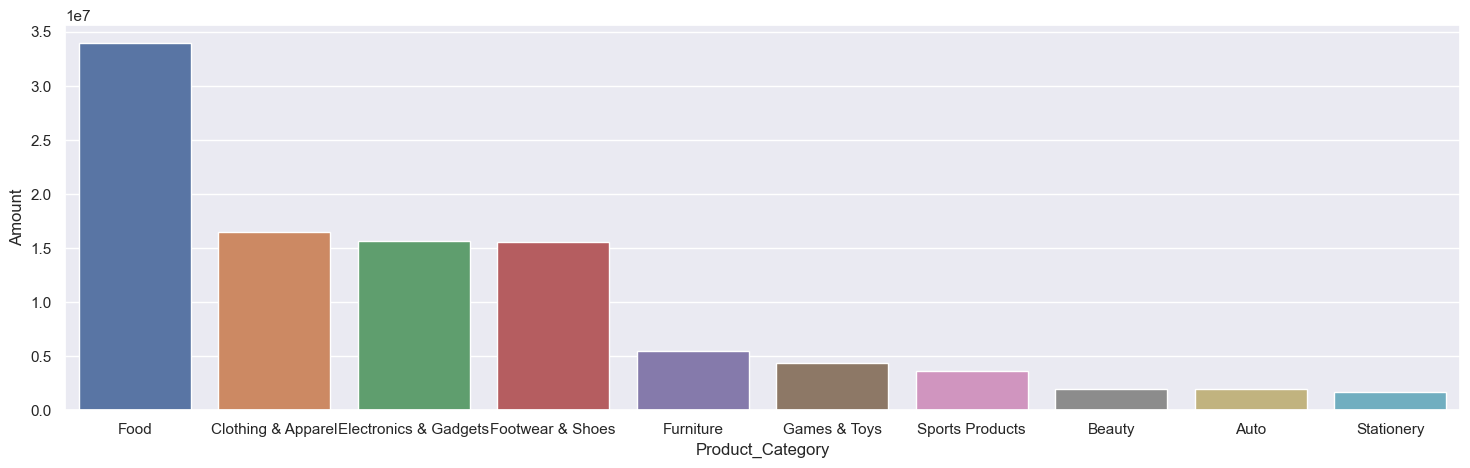

In [36]:
gh=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data=gh,x='Product_Category',y='Amount')


From above graph we can see that most of the sold products are Food,Clothing and Electronics category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

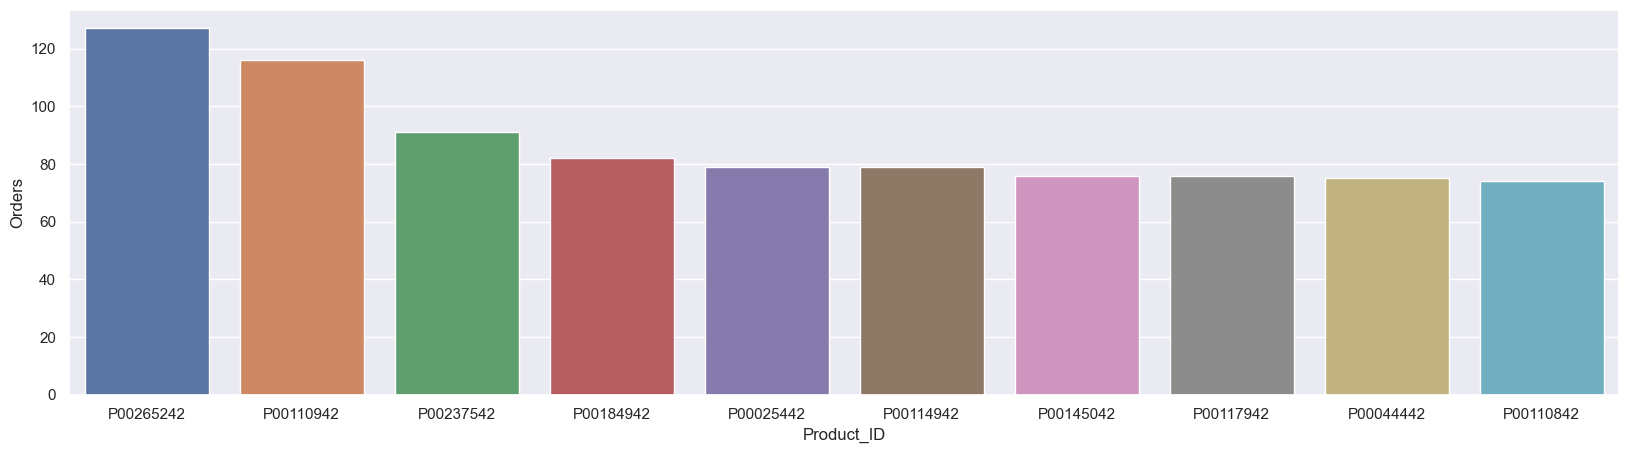

In [37]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

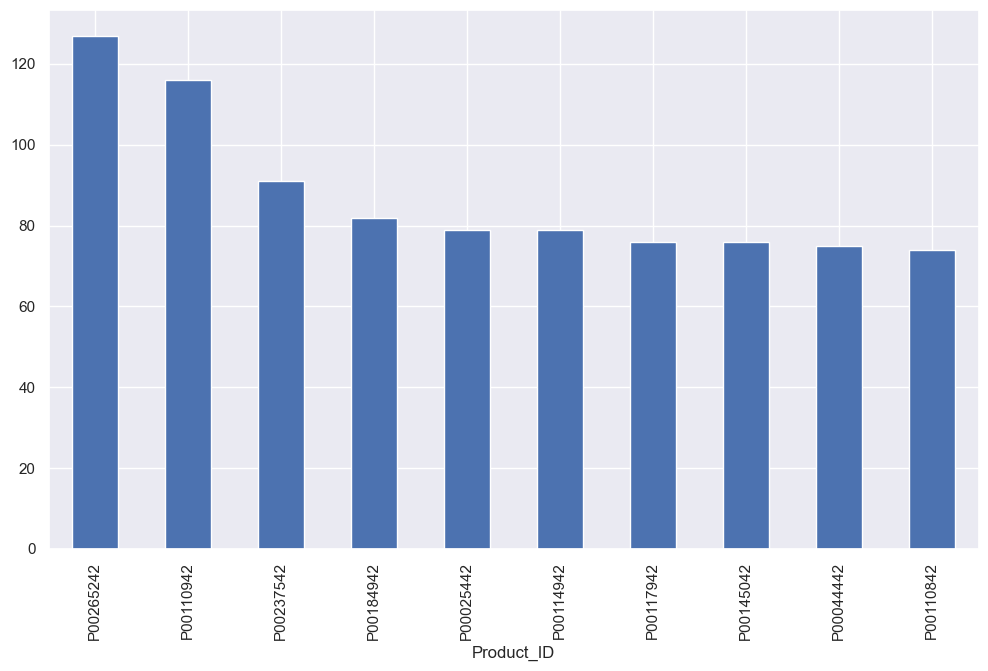

In [38]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

 Conclusion:
             Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are  
             more likely to buy products from Food, Clothing and Electronics category .

# Author Arvind Yadav - www.linkedin.com/in/arvind-yadav-47076427b